# Objectif

Prédire les chances d'admission d'étudiants (y compris entre 0 et 1) en fonction de paramètres (GRE Scores GRE (sur 340), score TOEFL (sur 120), note en université (sur 5), force de la déclaration d'intention (sur 5) et  force de la lettre de recommandation (sur 5), GPA, Experience en recherche (0 ou 1)

# Chargement des données 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data0 = pd.read_csv("./Admission_Predict.csv", sep=',')
# realtest= pd.read_csv("./Admission_Predict_Ver1.1.csv", sep=',')


# Observation des données

In [2]:
print(type(data0))     
data0.head()
data=data0.rename(columns={"Serial No.": "No", "GRE Score": "GRE", "TOEFL Score":"TOEFL", "University Rating": "Univ", "Chance of Admit ": "Chance_Admit"})
data.head()

<class 'pandas.core.frame.DataFrame'>


,No,GRE,TOEFL,Univ,SOP,LOR,CGPA,Research,Chance_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.describe()

,No,GRE,TOEFL,Univ,SOP,LOR,CGPA,Research,Chance_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
print(data.shape)
for i in data.columns:
    data[i]=data[i].astype(np.float64)
data.info()

(400, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No            400 non-null    float64
 1   GRE           400 non-null    float64
 2   TOEFL         400 non-null    float64
 3   Univ          400 non-null    float64
 4   SOP           400 non-null    float64
 5   LOR           400 non-null    float64
 6   CGPA          400 non-null    float64
 7   Research      400 non-null    float64
 8   Chance_Admit  400 non-null    float64
dtypes: float64(9)
memory usage: 28.2 KB


In [5]:
#Nombre de valeurs manquantes
print("donnees manquantes dans le train set:", data.isnull().sum())

donnees manquantes dans le train set: No              0
GRE             0
TOEFL           0
Univ            0
SOP             0
LOR             0
CGPA            0
Research        0
Chance_Admit    0
dtype: int64


Il n'y a pas de valeurs manquantes dans le training set. 

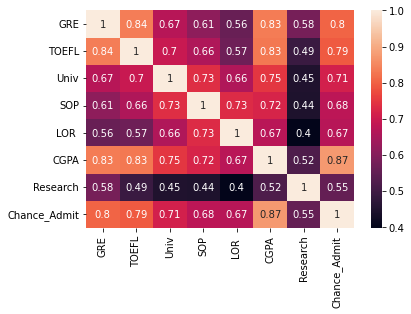

In [6]:
data2=data.drop(columns=["No"])
corr_matrix=data2.corr()
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [7]:
Y_train=data.pop("Chance_Admit")
#print(Y_train[0:2])

X_train=data.drop(columns=["No"])
print(type(X_train))
print(X_train[0:2])

<class 'pandas.core.frame.DataFrame'>
     GRE  TOEFL  Univ  SOP  LOR   CGPA  Research
0  337.0  118.0   4.0  4.5   4.5  9.65       1.0
1  324.0  107.0   4.0  4.0   4.5  8.87       1.0


On split les données de training en training set et validation set

In [8]:
from sklearn.model_selection import train_test_split
X_train_split, X_val, Y_train_split, Y_val = train_test_split(X_train, Y_train, test_size=0.33, random_state=0)
print("taille des sets", X_train_split.shape, Y_train_split.shape, X_val.shape, Y_val.shape)

taille des sets (268, 7) (268,) (132, 7) (132,)


# Tests de modèles de régression et performances

[0.0064675 0.        0.        0.        0.        0.        0.       ]
-1.3224272970966244
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': 0, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
R2: 0.5187928215292901


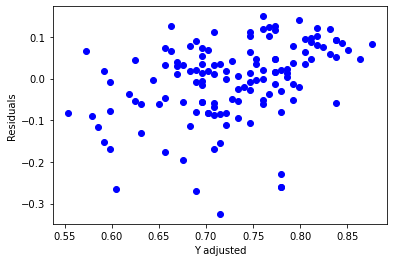

(array([ 1.,  0.,  4.,  0.,  1.,  1.,  3.,  2.,  4.,  4.,  9., 14.,  7.,
        13., 16., 18., 12., 10.,  9.,  4.]),
 array([-0.32483616, -0.30109979, -0.27736341, -0.25362704, -0.22989067,
        -0.20615429, -0.18241792, -0.15868154, -0.13494517, -0.1112088 ,
        -0.08747242, -0.06373605, -0.03999967, -0.0162633 ,  0.00747307,
         0.03120945,  0.05494582,  0.0786822 ,  0.10241857,  0.12615494,
         0.14989132]),
 <BarContainer object of 20 artists>)

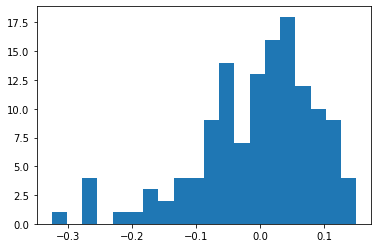

In [9]:
# Régression linaire ElasticNet avec penalisation l1 et l2
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X_train_split, Y_train_split)
print(regr.coef_)
print(regr.intercept_)

#Afficher R2 calulé sur l'ensemble de validation
print(regr.get_params(deep=True))
print("R2:", regr.score(X_val, Y_val))
Y_hat=regr.predict(X_val)
#print(Y_hat)


fig=plt.plot(Y_hat, (Y_val-Y_hat), "ob")
plt.xlabel('Y adjusted')
plt.ylabel('Residuals')
plt.show()
plt.hist(Y_val-Y_hat, bins=20)

R2 0.6964660673240395
[0.698  0.6313 0.7645 0.6642 0.7151 0.6584 0.7109 0.6687 0.9191 0.923
 0.5347 0.9114 0.7006 0.46   0.8455 0.6626 0.6732 0.8098 0.6116 0.7378
 0.8397 0.854  0.6444 0.4536 0.8148 0.6461 0.4325 0.6815 0.865  0.6878
 0.6553 0.7271 0.7432 0.6472 0.7972 0.7612 0.6568 0.8838 0.6289 0.9418
 0.7293 0.6735 0.6754 0.8033 0.825  0.6504 0.5749 0.6793 0.6442 0.6289
 0.6702 0.786  0.6472 0.8525 0.6954 0.7278 0.6506 0.7361 0.7459 0.8315
 0.7528 0.4841 0.6433 0.5166 0.829  0.8751 0.7192 0.9137 0.7569 0.7298
 0.5878 0.8395 0.868  0.6035 0.9202 0.615  0.6693 0.6557 0.9252 0.5579
 0.6816 0.7094 0.611  0.8569 0.6072 0.7821 0.7005 0.7132 0.7863 0.8153
 0.7594 0.9375 0.5184 0.5683 0.8354 0.6884 0.7521 0.6713 0.7363 0.7703
 0.705  0.673  0.7164 0.5775 0.75   0.6819 0.9342 0.6402 0.7018 0.6703
 0.6156 0.7507 0.7169 0.6698 0.8186 0.9015 0.9217 0.7339 0.7031 0.6523
 0.6278 0.6604 0.9034 0.6812 0.5042 0.9255 0.9144 0.6822 0.7073 0.5026
 0.9117 0.6723]


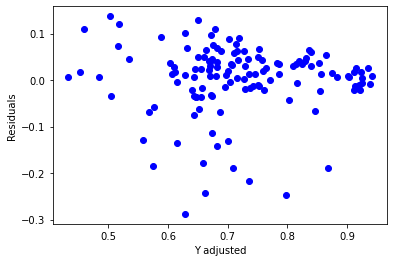

(array([ 1.,  1.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,  0.,  6.,  7., 14.,
        20., 26., 22., 12.,  5.,  4.,  3.]),
 array([-0.2878 , -0.26654, -0.24528, -0.22402, -0.20276, -0.1815 ,
        -0.16024, -0.13898, -0.11772, -0.09646, -0.0752 , -0.05394,
        -0.03268, -0.01142,  0.00984,  0.0311 ,  0.05236,  0.07362,
         0.09488,  0.11614,  0.1374 ]),
 <BarContainer object of 20 artists>)

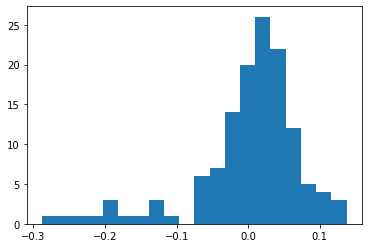

In [10]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=100, random_state=0)
regr.fit(X_train_split, Y_train_split)

#Afficher R2 calulé sur l'ensemble de validation
print("R2", regr.score(X_val, Y_val))
Y_hat=regr.predict(X_val)
print(Y_hat)

fig=plt.plot(Y_hat, (Y_val-Y_hat), "ob")
plt.xlabel('Y adjusted')
plt.ylabel('Residuals')
plt.show()
plt.hist(Y_val-Y_hat, bins=20)

alpha: 0.002808234573401648
l1_ratio 0.5
intercept: -1.39302622720056
coeff: [0.00247755 0.00259115 0.00268322 0.00137356 0.01916244 0.11246678
 0.01273363]
R2: 0.7569074724281852
[0.698  0.6313 0.7645 0.6642 0.7151 0.6584 0.7109 0.6687 0.9191 0.923
 0.5347 0.9114 0.7006 0.46   0.8455 0.6626 0.6732 0.8098 0.6116 0.7378
 0.8397 0.854  0.6444 0.4536 0.8148 0.6461 0.4325 0.6815 0.865  0.6878
 0.6553 0.7271 0.7432 0.6472 0.7972 0.7612 0.6568 0.8838 0.6289 0.9418
 0.7293 0.6735 0.6754 0.8033 0.825  0.6504 0.5749 0.6793 0.6442 0.6289
 0.6702 0.786  0.6472 0.8525 0.6954 0.7278 0.6506 0.7361 0.7459 0.8315
 0.7528 0.4841 0.6433 0.5166 0.829  0.8751 0.7192 0.9137 0.7569 0.7298
 0.5878 0.8395 0.868  0.6035 0.9202 0.615  0.6693 0.6557 0.9252 0.5579
 0.6816 0.7094 0.611  0.8569 0.6072 0.7821 0.7005 0.7132 0.7863 0.8153
 0.7594 0.9375 0.5184 0.5683 0.8354 0.6884 0.7521 0.6713 0.7363 0.7703
 0.705  0.673  0.7164 0.5775 0.75   0.6819 0.9342 0.6402 0.7018 0.6703
 0.6156 0.7507 0.7169 0.6698 0.8186 0.90

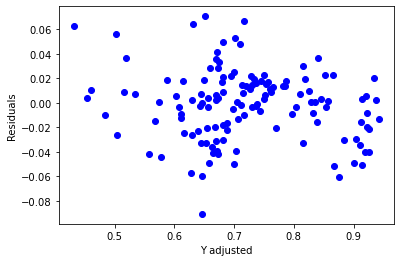

(array([ 1.,  0.,  0.,  2.,  3.,  4.,  9.,  9.,  8.,  8., 15., 19., 17.,
        17.,  7.,  4.,  1.,  3.,  2.,  3.]),
 array([-0.09053299, -0.08247478, -0.07441658, -0.06635837, -0.05830017,
        -0.05024197, -0.04218376, -0.03412556, -0.02606736, -0.01800915,
        -0.00995095, -0.00189275,  0.00616546,  0.01422366,  0.02228186,
         0.03034007,  0.03839827,  0.04645648,  0.05451468,  0.06257288,
         0.07063109]),
 <BarContainer object of 20 artists>)

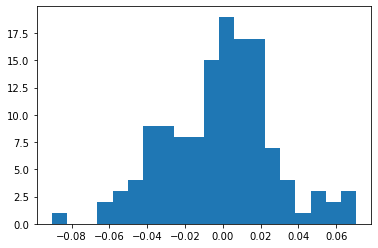

In [11]:
from sklearn.linear_model import ElasticNetCV

regr=ElasticNetCV(cv=5, random_state=None)
regr.fit(X_train_split, Y_train_split)   
print("alpha:", regr.alpha_)
print("l1_ratio", regr.l1_ratio_)
print("intercept:", regr.intercept_)
print("coeff:", regr.coef_)


#Afficher R2 sur calculé sur l'ensemble de validation
print("R2:", regr.score(X_val, Y_val))
Y_val=regr.predict(X_val)
print(Y_hat)


fig=plt.plot(Y_hat, (Y_val-Y_hat), "ob")
plt.xlabel('Y adjusted')
plt.ylabel('Residuals')
plt.show()
plt.hist(Y_val-Y_hat, bins=20)

In [12]:
!pip install glmnet_py
import glmnet_python
import scipy, matplotlib.pyplot as plt
from glmnet import glmnet
#X_train_split.to_numpy()
#Y_train_split.to_numpy()
#fit = glmnet(x=X_train_split, y=Y_train_split, family = 'gaussian', alpha = 0.5)
#glmnetPlot(fit, xvar = 'lambda', label = True);